Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load Data

In [2]:
raw_data_path = "../data/raw_workout_log.csv"
transformed_data_path = "../data/transformed_workout_log.csv"

try:
    df_raw = pd.read_csv(raw_data_path)
    df_raw['date'] = pd.to_datetime(df_raw['date'])
    print("Raw data loaded successfully:")
    print(df_raw.head())
    print("\nRaw Data Info:")
    df_raw.info()
except FileNotFoundError:
    print(f"Error: {raw_data_path} not found. Make sure you've logged some workouts or run src/transform.py.")
    df_raw = pd.DataFrame() # Create empty DataFrame to avoid errors later

try:
    df_transformed = pd.read_csv(transformed_data_path)
    df_transformed['date'] = pd.to_datetime(df_transformed['date'])
    print("\nTransformed data loaded successfully:")
    print(df_transformed.head())
    print("\nTransformed Data Info:")
    df_transformed.info()
except FileNotFoundError:
    print(f"Error: {transformed_data_path} not found. Run src/transform.py first.")
    df_transformed = pd.DataFrame() # Create empty DataFrame

Raw data loaded successfully:
        date     exercise  weight_kg  reps  sets  rpe                   notes
0 2025-05-01  Bench Press       70.0    10     3    7              Felt solid
1 2025-05-01        Squat      100.0    10     3    8  Felt strong but tiring
2 2025-05-03     Deadlift       90.0     8     3    8  Grip slipping slightly
3 2025-05-06  Bench Press       72.5    10     3    7        Progressing well
4 2025-05-06        Squat      105.0    10     3    8             Steady form

Raw Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       22 non-null     datetime64[ns]
 1   exercise   22 non-null     object        
 2   weight_kg  22 non-null     float64       
 3   reps       22 non-null     int64         
 4   sets       22 non-null     int64         
 5   rpe        22 non-null     int64         
 6   not

Basic Statistics

In [3]:
if not df_raw.empty:
    print("\nRaw Data Descriptive Statistics:")
    print(df_raw.describe())
    print("\nUnique Exercises in Raw Data:")
    print(df_raw['exercise'].value_counts())

if not df_transformed.empty:
    print("\nTransformed Data Descriptive Statistics:")
    print(df_transformed.describe())
    print("\nCheck for missing values in Transformed Data:")
    print(df_transformed.isnull().sum())


Raw Data Descriptive Statistics:
                                date   weight_kg       reps  sets        rpe
count                             22   22.000000  22.000000  22.0  22.000000
mean   2025-05-17 22:54:32.727272704   94.431818   8.000000   3.0   8.000000
min              2025-05-01 00:00:00   50.000000   6.000000   3.0   7.000000
25%              2025-05-08 12:00:00   78.125000   6.500000   3.0   8.000000
50%              2025-05-16 00:00:00  100.000000   8.000000   3.0   8.000000
75%              2025-05-24 00:00:00  109.375000   9.500000   3.0   8.000000
max              2025-07-03 00:00:00  120.000000  10.000000   3.0   9.000000
std                              NaN   19.022728   1.511858   0.0   0.690066

Unique Exercises in Raw Data:
exercise
Bench Press    8
Squat          7
Deadlift       7
Name: count, dtype: int64

Transformed Data Descriptive Statistics:
                                date  weight_lbs        reps   sets  \
count                            170  170.0

Overall Workout Trends

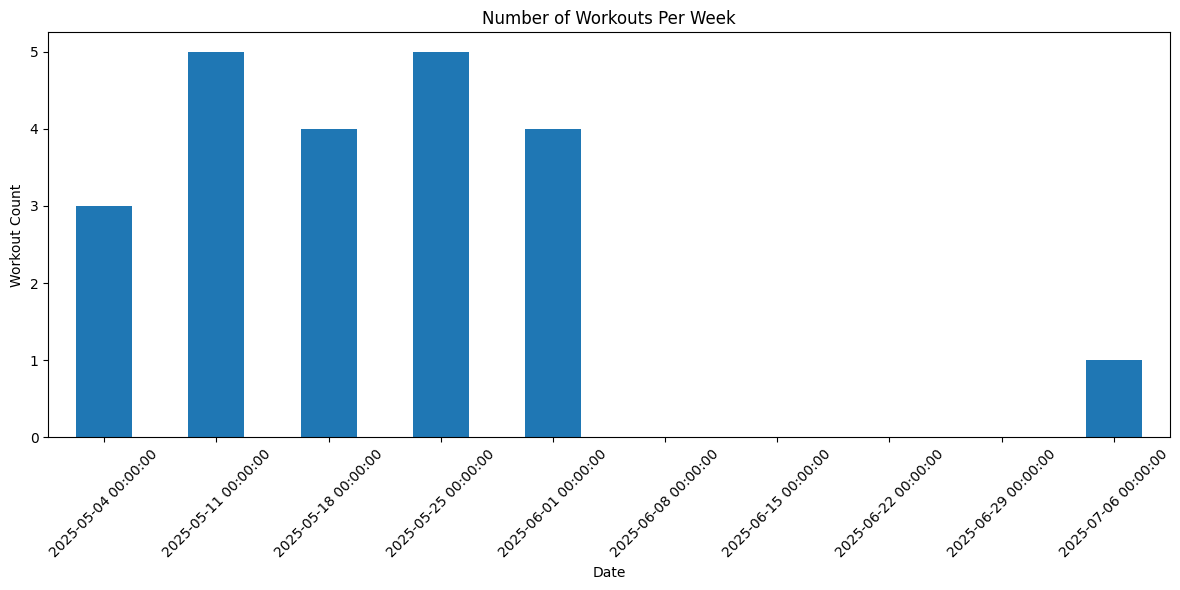

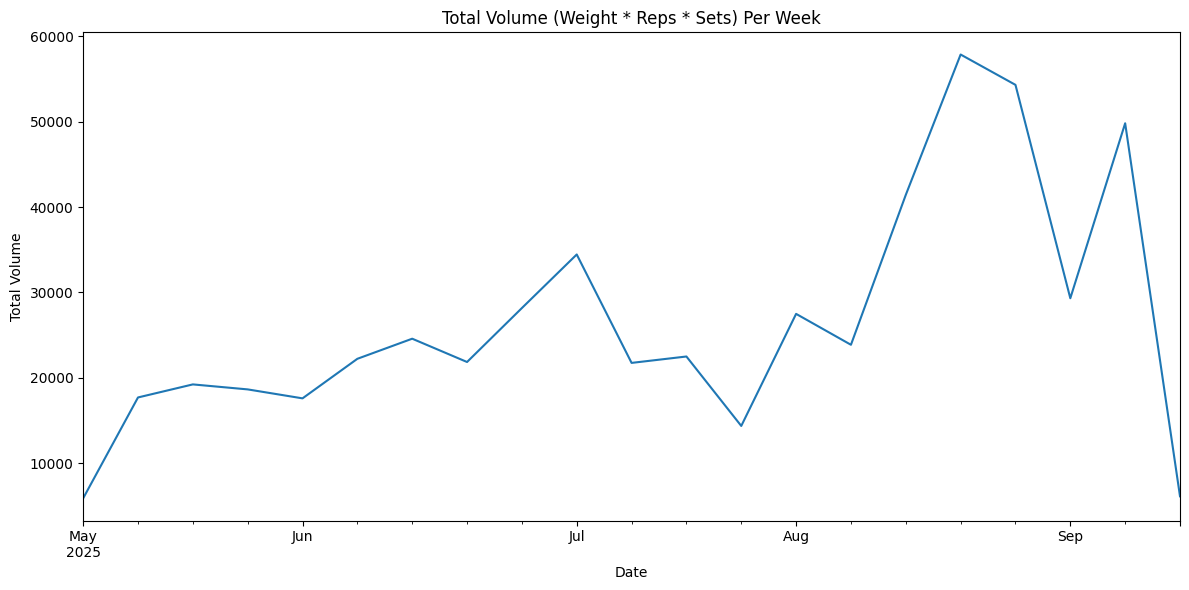

In [6]:
if not df_transformed.empty:
    plt.figure(figsize=(12, 6))
    df_raw.set_index('date').resample('W').size().plot(kind='bar')
    plt.title('Number of Workouts Per Week')
    plt.ylabel('Workout Count')
    plt.xlabel('Date')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    df_transformed['volume'] = df_transformed['weight_lbs'] * df_transformed['reps'] * df_transformed['sets']
    plt.figure(figsize=(12, 6))
    df_transformed.set_index('date')['volume'].resample('W').sum().plot()
    plt.title('Total Volume (Weight * Reps * Sets) Per Week')
    plt.ylabel('Total Volume')
    plt.xlabel('Date')
    plt.tight_layout()
    plt.show()

Exercise-Specific Weight Progression

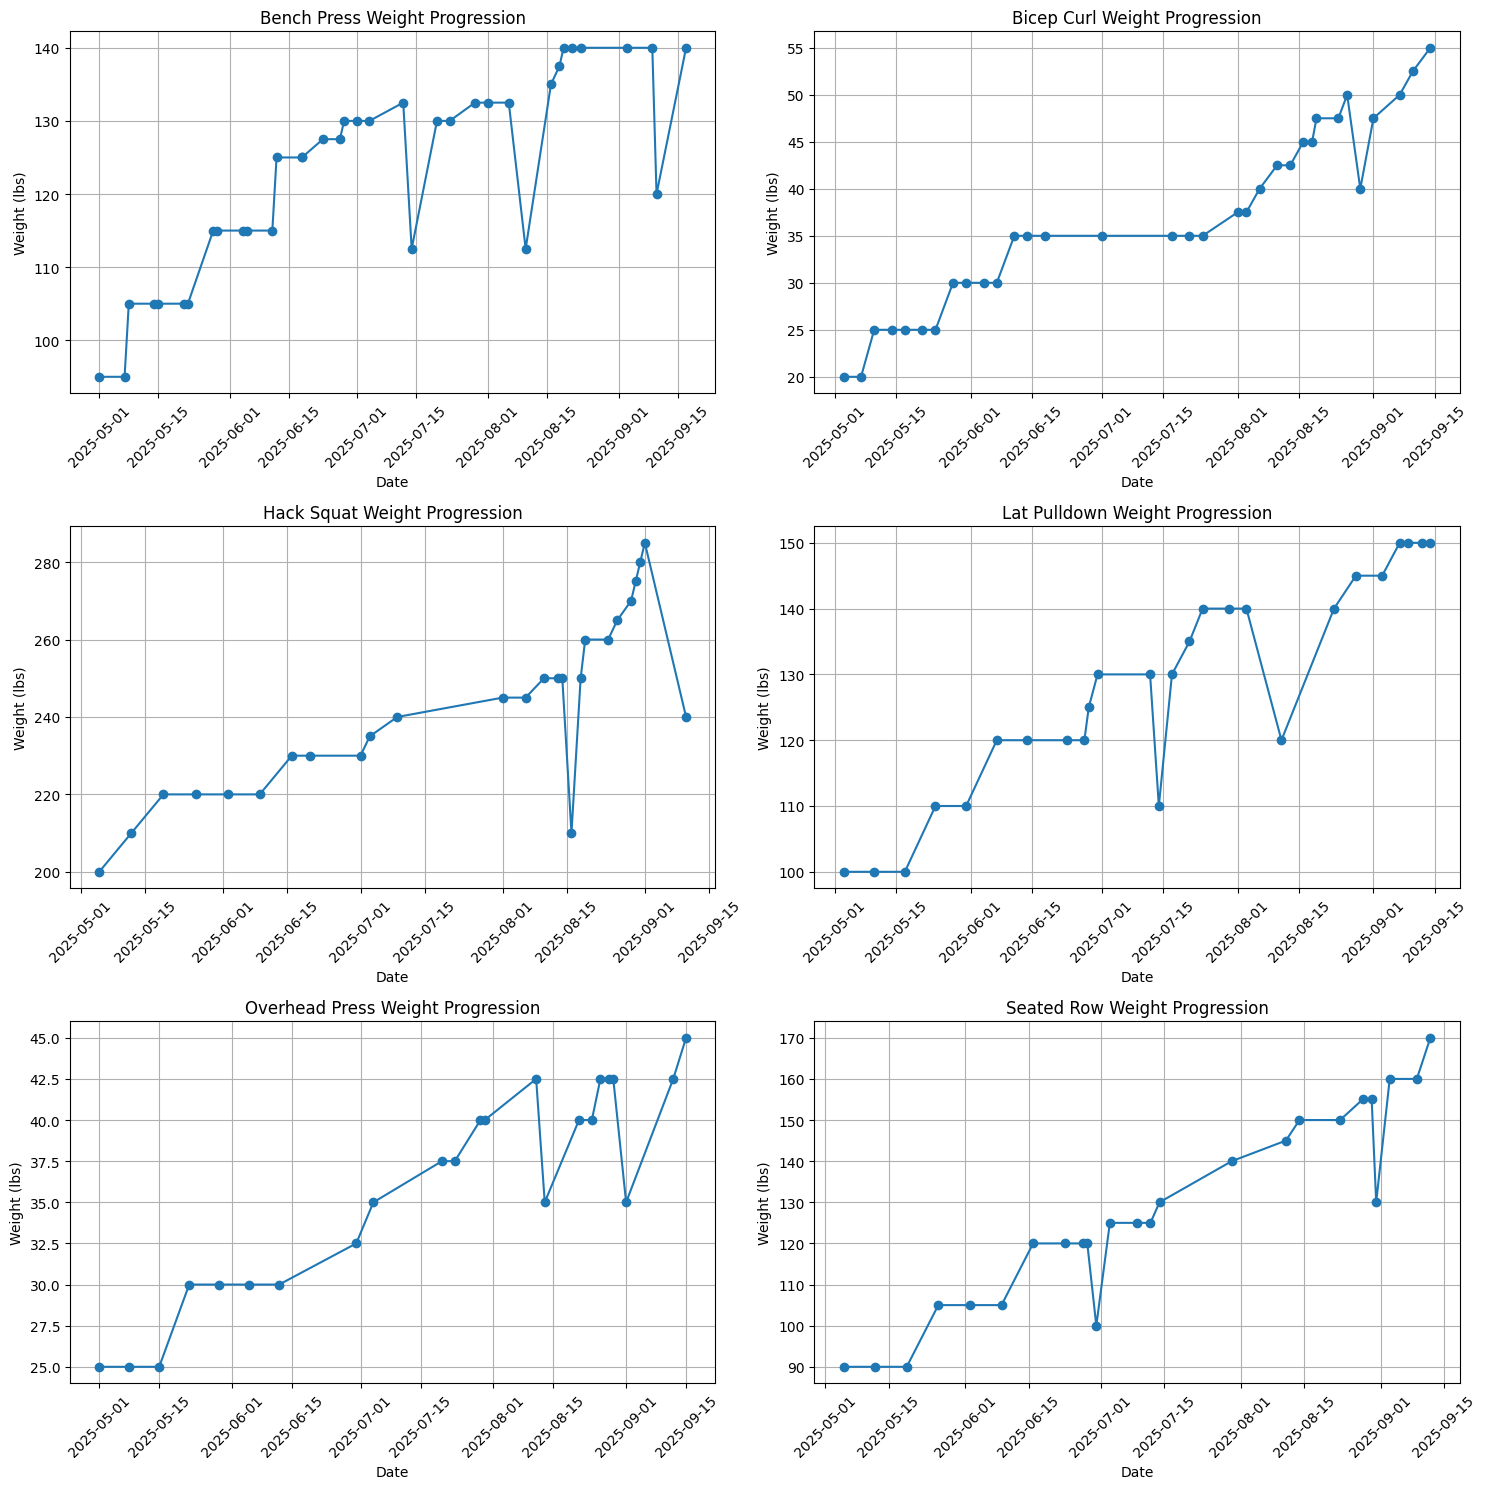

In [7]:
if not df_transformed.empty:
    unique_exercises = df_transformed['exercise'].unique()
    n_cols = 2
    n_rows = (len(unique_exercises) + n_cols - 1) // n_cols # Calculate rows needed

    plt.figure(figsize=(15, n_rows * 5))
    for i, exercise in enumerate(unique_exercises):
        plt.subplot(n_rows, n_cols, i + 1)
        exercise_df = df_transformed[df_transformed['exercise'] == exercise].sort_values('date')
        plt.plot(exercise_df['date'], exercise_df['weight_lbs'], marker='o', linestyle='-')
        plt.title(f'{exercise} Weight Progression')
        plt.xlabel('Date')
        plt.ylabel('Weight (lbs)')
        plt.grid(True)
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

RPE and Reps Distribution

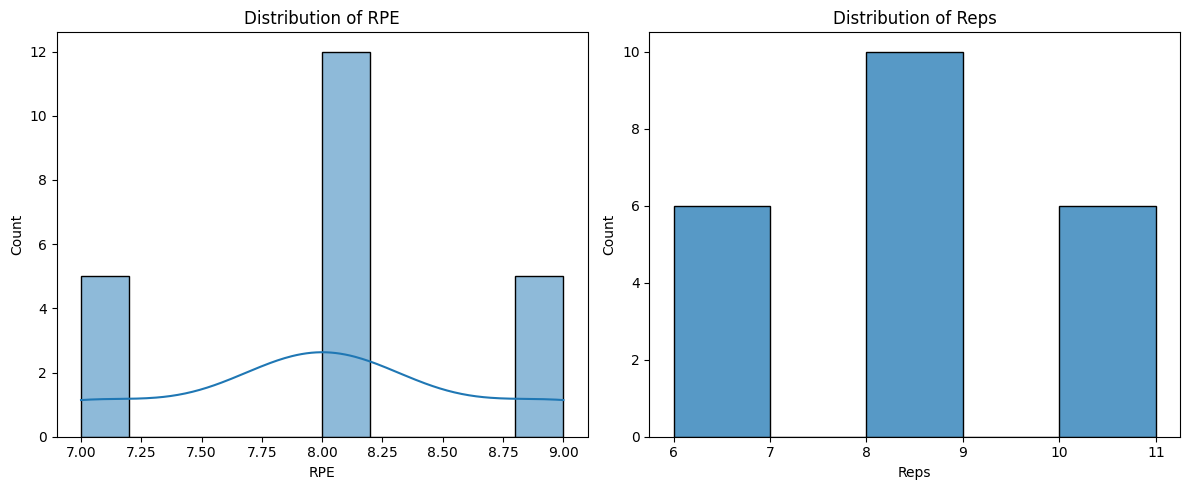

In [8]:
if not df_raw.empty:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(df_raw['rpe'], bins=10, kde=True)
    plt.title('Distribution of RPE')
    plt.xlabel('RPE')
    plt.ylabel('Count')

    plt.subplot(1, 2, 2)
    sns.histplot(df_raw['reps'], bins=range(df_raw['reps'].min(), df_raw['reps'].max() + 2), kde=False)
    plt.title('Distribution of Reps')
    plt.xlabel('Reps')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()